In [1]:
from sklearn.datasets import make_moons

In [2]:
import tensorflow.compat.v1 as old_tf

In [3]:
import numpy as np

In [4]:
X, y = make_moons( n_samples= 10000, noise = 0.1)

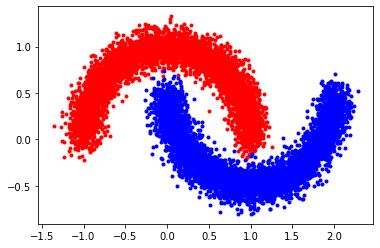

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot( X[y== 0][:,0] ,X[y==0][:,1] , 'r.' )
plt.plot( X[y== 1][:,0] ,X[y==1][:,1] , 'b.' )

In [6]:
m, n = X.shape

In [7]:
m,n

(10000, 2)

In [8]:
bias = np.ones((m,1))
X_with_bias = np.c_[ bias , X]

In [9]:
X_with_bias

array([[ 1.        ,  0.87476142,  0.34860661],
       [ 1.        , -0.83886502,  0.58242965],
       [ 1.        ,  0.93285719,  0.05898765],
       ...,
       [ 1.        ,  0.04788421,  0.24469143],
       [ 1.        ,  1.07634492,  0.29622807],
       [ 1.        ,  1.8326429 , -0.12175827]])

In [10]:
X_with_bias.shape

(10000, 3)

In [11]:
old_tf.disable_eager_execution()

In [68]:
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [65]:
X_new = old_tf.constant(X_with_bias, dtype=old_tf.float32, name = 'X')
y_new = old_tf.constant(y, dtype=old_tf.float32, name = 'y')

theta = old_tf.Variable(old_tf.random_uniform([n+1, 1], -1.0, 1.0) , name = 'theta')

logits = old_tf.matmul(X_new, theta)

y_proba = old_tf.sigmoid(-logits)

small_value = 1e-7

loss = -old_tf.reduce_mean((y_new * old_tf.log(y_proba + small_value) ) + ( 1 - y_new ) * old_tf.log(1 -y_proba + small_value))

optimizer = old_tf.train.GradientDescentOptimizer(learning_rate=0.01)

training_op = optimizer.minimize(loss)

In [66]:
init = old_tf.global_variables_initializer()

In [67]:
n_epochs = 1000

with old_tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        
        if epoch %100 == 0:
            print(f'{epoch} = {loss.eval()}')
            
        sess.run(training_op)
        
    best_theta = theta.eval()
    
    

0 = 1.174110770225525
100 = 0.8884494304656982
200 = 0.7017386555671692
300 = 0.59151291847229
400 = 0.525905966758728
500 = 0.4838734269142151
600 = 0.4546622037887573
700 = 0.4329756796360016
800 = 0.41606956720352173
900 = 0.40241172909736633


In [15]:
def random_batch(X_train, y_train, batch_size):
    rnd_indices = np.random.randint(0, len(X_train), batch_size)
    X_batch = X_train[rnd_indices]
    y_batch = y_train[rnd_indices]
    return X_batch, y_batch

In [18]:
X_with_bias

array([[ 1.        ,  0.87476142,  0.34860661],
       [ 1.        , -0.83886502,  0.58242965],
       [ 1.        ,  0.93285719,  0.05898765],
       ...,
       [ 1.        ,  0.04788421,  0.24469143],
       [ 1.        ,  1.07634492,  0.29622807],
       [ 1.        ,  1.8326429 , -0.12175827]])

In [23]:
y.shape

(10000,)

In [24]:
y = y.reshape(-1, 1)

In [25]:
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [116]:
X_mb = old_tf.placeholder(shape = [None, n+1] , dtype =old_tf.float32, name= 'X')
y_mb = old_tf.placeholder(shape = [None , 1] , dtype=old_tf.float32, name = 'y')
theta_mb = old_tf.Variable( old_tf.random_uniform( [n+1 , 1 ], -1.0 , 1.0 ) ,name = 'theta')
                           
logits = old_tf.matmul(X_mb, theta_mb)

y_proba = old_tf.sigmoid(-logits)

loss = -old_tf.reduce_mean((y_mb) * old_tf.log(y_proba + small_value) + (1-y_mb) * ( old_tf.log(1 - y_proba + small_value)))

optimizer = old_tf.train.GradientDescentOptimizer(learning_rate=0.01)

training_op = optimizer.minimize(loss)
                        
n_epochs = 1000
batches = 50
init = old_tf.global_variables_initializer()
saver = old_tf.train.Saver()

with old_tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        
        for batch in range(batches):
            X_batch, y_batch = random_batch(X_with_bias, y, batch)
            sess.run(training_op, feed_dict = {X_mb : X_batch , y_mb :y_batch})
        loss_val = loss.eval(feed_dict={X_mb:X_with_bias, y_mb:y})
        if epoch %100 == 0:
            print(f'{epoch} = {loss_val}')
        
    best_theta = theta.eval()
    y_proba_val = y_proba.eval(feed_dict={X_mb: X_with_bias, y_mb: y})
    
    save_path = saver.save(sess, '/Users/Kunal/ML/Neural Network/LrModel.cpkt')

FailedPreconditionError: Error while reading resource variable logistic_regression_1/model/old_theta from Container: localhost. This could mean that the variable was uninitialized. Not found: Container localhost does not exist. (Could not find resource: localhost/logistic_regression_1/model/old_theta)
	 [[node logistic_regression_1/model/theta/Initializer/ReadVariableOp (defined at <ipython-input-95-4ff3db78254a>:9) ]]

Errors may have originated from an input operation.
Input Source operations connected to node logistic_regression_1/model/theta/Initializer/ReadVariableOp:
 logistic_regression_1/model/old_theta (defined at <ipython-input-95-4ff3db78254a>:7)

Original stack trace for 'logistic_regression_1/model/theta/Initializer/ReadVariableOp':
  File "/Users/Kunal/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/Kunal/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 583, in start
    self.io_loop.start()
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 153, in start
    self.asyncio_loop.run_forever()
  File "/Users/Kunal/anaconda3/lib/python3.6/asyncio/base_events.py", line 442, in run_forever
    self._run_once()
  File "/Users/Kunal/anaconda3/lib/python3.6/asyncio/base_events.py", line 1462, in _run_once
    handle._run()
  File "/Users/Kunal/anaconda3/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 541, in execute_request
    user_expressions, allow_stdin,
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 300, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2858, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2886, in _run_cell
    return runner(coro)
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3063, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3254, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-97-df9e9787a89a>", line 3, in <module>
    training_op, loss, init, saver, loss_summary, y_proba = logistic_regression(X_mb,y_mb)
  File "<ipython-input-95-4ff3db78254a>", line 9, in logistic_regression
    theta = old_tf.Variable(old_theta, name='theta')
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/tensorflow_core/python/ops/variables.py", line 258, in __call__
    return cls._variable_v1_call(*args, **kwargs)
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/tensorflow_core/python/ops/variables.py", line 219, in _variable_v1_call
    shape=shape)
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/tensorflow_core/python/ops/variables.py", line 197, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/tensorflow_core/python/ops/variable_scope.py", line 2596, in default_variable_creator
    shape=shape)
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/tensorflow_core/python/ops/variables.py", line 262, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/tensorflow_core/python/ops/resource_variable_ops.py", line 1411, in __init__
    distribute_strategy=distribute_strategy)
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/tensorflow_core/python/ops/resource_variable_ops.py", line 1543, in _init_from_args
    name="initial_value", dtype=dtype)
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/tensorflow_core/python/framework/ops.py", line 1314, in convert_to_tensor
    ret = conversion_func(value, dtype=dtype, name=name, as_ref=as_ref)
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/tensorflow_core/python/ops/resource_variable_ops.py", line 1794, in _dense_var_to_tensor
    return var._dense_var_to_tensor(dtype=dtype, name=name, as_ref=as_ref)  # pylint: disable=protected-access
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/tensorflow_core/python/ops/resource_variable_ops.py", line 1219, in _dense_var_to_tensor
    return self.value()
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/tensorflow_core/python/ops/resource_variable_ops.py", line 529, in value
    return self._read_variable_op()
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/tensorflow_core/python/ops/resource_variable_ops.py", line 613, in _read_variable_op
    self._dtype)
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/tensorflow_core/python/ops/gen_resource_variable_ops.py", line 483, in read_variable_op
    "ReadVariableOp", resource=resource, dtype=dtype, name=name)
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/tensorflow_core/python/framework/op_def_library.py", line 742, in _apply_op_helper
    attrs=attr_protos, op_def=op_def)
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/tensorflow_core/python/framework/ops.py", line 3322, in _create_op_internal
    op_def=op_def)
  File "/Users/Kunal/anaconda3/lib/python3.6/site-packages/tensorflow_core/python/framework/ops.py", line 1756, in __init__
    self._traceback = tf_stack.extract_stack()


In [49]:
best_theta

array([[-0.8610127 ],
       [-0.76948786],
       [-0.15632892]], dtype=float32)

In [59]:
y_proba_val

array([[0.4680889 ],
       [0.02875952],
       [0.8357515 ],
       ...,
       [0.37689108],
       [0.60251725],
       [0.9769182 ]], dtype=float32)

In [62]:
y_preds = np.where(y_proba_val <=0.5 , 0, 1)

In [64]:
accuracy_score(y, y_preds)

0.8873

In [74]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [75]:
precision_score(y, y_preds), recall_score(y, y_preds), f1_score(y, y_preds)

(0.8856801433977295, 0.8894, 0.8875361740345276)

In [345]:
old_tf.reset_default_graph()

In [346]:
def logistic_regression(X,y, old_theta = None, learning_rate=0.01):
    instances = X.get_shape()[1]
    with old_tf.name_scope('logistic_regression'):
        
        with old_tf.name_scope('model'):
#             if old_theta is None:
#                 old_theta = old_tf.Variable(old_tf.random_uniform([instances,1], -1.0, 1.0))
#                 print('in')
            theta = old_tf.Variable(old_tf.random_uniform([instances,1], -1.0, 1.0))
            
            logit = old_tf.matmul(X, theta)
            
            y_proba = old_tf.sigmoid(-logit)
            
        with old_tf.name_scope('train'):
            
            loss = old_tf.losses.log_loss(y, y_proba, scope="loss")
            optimizer = old_tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
            training_op = optimizer.minimize(loss)
            loss_summary = old_tf.summary.scalar('log_loss', loss)
            
        with old_tf.name_scope('init'):
            init = old_tf.global_variables_initializer()
            
        with old_tf.name_scope('saver'):
            saver = old_tf.train.Saver()
            
    return training_op, loss, init, saver, loss_summary, y_proba

def get_log_dir():
    import datetime
    now = datetime.datetime.utcnow().strftime('%Y-%m-%d:%H:%M:%S')
    return '/Users/Kunal/ML/Neural Network/lr-logs/{}'.format(now)
                

In [347]:
X_mb

<tf.Tensor 'X:0' shape=(None, 3) dtype=float32>

In [348]:
n_epochs=10001
batches = 100
learning_rate=0.03

In [349]:
X_mb = old_tf.placeholder(shape = [None, n+1] , dtype =old_tf.float32, name= 'X')
y_mb = old_tf.placeholder(shape = [None , 1] , dtype=old_tf.float32, name = 'y')

training_op, loss, init, saver, loss_summary, y_proba = logistic_regression(X_mb,y_mb,learning_rate=learning_rate)

In [350]:
logdir = get_log_dir()
file_writer = old_tf.summary.FileWriter( logdir, old_tf.get_default_graph())
n_epochs=1001
logdir = get_log_dir()
checkpoint_path = f"{logdir}/my_logreg_model.ckpt"
checkpoint_epoch_path = f"{checkpoint_path}.epoch"
final_model_path = f"{logdir}/my_logreg_model"

In [351]:
final_model_path

'/Users/Kunal/ML/Neural Network/lr-logs/2020-04-24:08:04:39/my_logreg_model'

In [352]:
init = old_tf.global_variables_initializer()

In [353]:
# init = old_tf.global_variables_initializer()
with old_tf.Session() as sess:
    
    if os.path.isfile(checkpoint_epoch_path):
        
        with open(checkpoint_epoch_path,'rb') as f:
            start_epoch = int(f.read())
            
        print(f'continuing from {start_epoch}')
        
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        
        sess.run(init)
        
    
    
    for epoch in range(start_epoch,n_epochs):
        for batch in range(batches):
            
            X_batch, y_batch = random_batch(X_with_bias, y, batches)
            sess.run(training_op, feed_dict={X_mb:X_batch, y_mb:y_batch})
            
        
        
        loss_val, loss_summary_str = sess.run([loss, loss_summary], feed_dict={X_mb:X_batch, y_mb:y_batch})
        
        file_writer.add_summary(loss_summary_str, epoch)
        
        if epoch % 500 == 0:
            
            print( f'loss at epoch : {epoch} = {loss_val}' )
            
            with open(checkpoint_epoch_path ,'wb') as f:
                f.write(b"%d"%epoch)
                
            saver.save(sess, checkpoint_path)
            print(f'saved checkpoint at epoch :{epoch}')
                
    saver.save(sess,final_model_path)
    y_proba_val = y_proba.eval(feed_dict = {X_mb : X_with_bias, y_mb : y})
    os.remove(checkpoint_epoch_path)
        

loss at epoch : 0 = 0.4381128251552582
saved checkpoint at epoch :0
loss at epoch : 500 = 0.18802914023399353
saved checkpoint at epoch :500
loss at epoch : 1000 = 0.28479185700416565
saved checkpoint at epoch :1000


In [339]:
y_original = y.reshape(y.shape[0])

In [340]:
y_pred = y_proba_val.reshape(y.shape[0])

In [341]:
y_pred = np.where(y_pred < 0.5, 0, 1)

In [342]:
accuracy_score(y_original, y_pred)

0.8875

In [343]:
precision_score(y_original, y_pred)

0.8860330743175932

In [344]:
recall_score(y_original, y_pred)

0.8894

In [317]:
with old_tf.Session() as sess:
    saver.restore(sess,final_model_path)
    y_proba_val=y_proba.eval(feed_dict={X_mb:X_with_bias, y_mb : y})

INFO:tensorflow:Restoring parameters from /Users/Kunal/ML/Neural Network/lr-logs/2020-04-24:07:28:42/my_logreg_model


array([[0.46686968],
       [0.02820977],
       [0.83534133],
       ...,
       [0.37430218],
       [0.6017957 ],
       [0.9770344 ]], dtype=float32)

In [319]:
len(y)

10000